In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data_Cleaning/Data/gurgaon_properties_v2.csv').drop_duplicates()
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,3173.0,Super Built up area 2812(261.24 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,2812.0,NaN,NaN,0,0,0,0,0,1,106
1,flat,m3m sierra 68,sector 68,1.08,8674.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,3,1.0,West,Relatively New,1245.0,1130.0,930.0,0,0,0,0,0,0,149
2,flat,ashiana anmol,sohna road,0.99,8215.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,6.0,East,Undefined,1205.0,NaN,900.0,0,0,0,0,0,1,49
3,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10.0,10.0,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,1,0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4.0,5.0,3+,12.0,South-East,Relatively New,2950.0,2650.0,2450.0,0,1,0,0,0,0,158


In [5]:
df.shape

(3803, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<b> Price

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\1176012756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

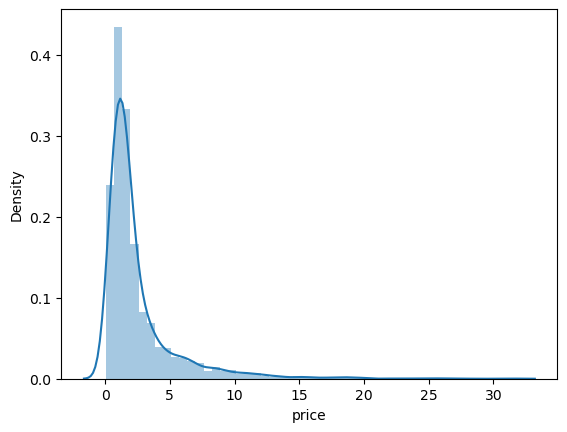

In [7]:
# Outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

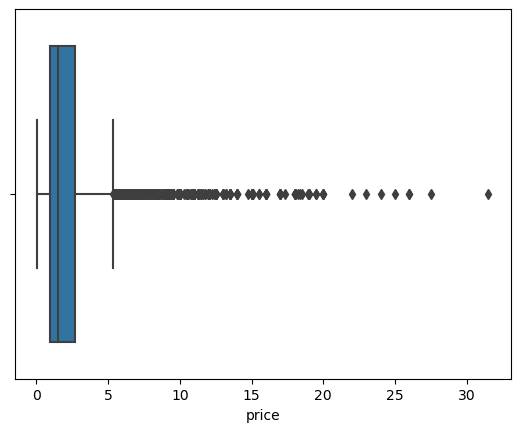

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [10]:
# Price col has geniune outliers and some data errors

<b> Price_per_sqft

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

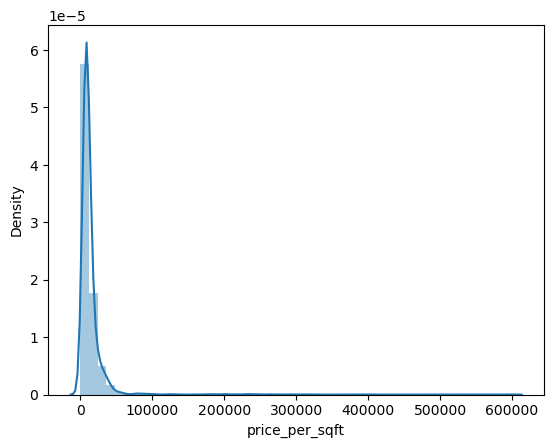

In [11]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

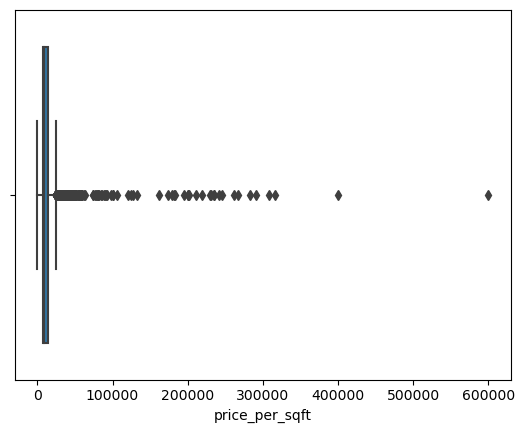

In [12]:
sns.boxplot(x=df['price_per_sqft'])

In [13]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_sqft_stats = outliers['price_per_sqft'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [14]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [15]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000/outliers_sqft['area']))

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\2275703336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000/outliers_sqft['area']))


In [16]:
outliers_sqft['price_per_sqft'].describe()

count      367.000000
mean     29160.735695
std      12308.413881
min       2689.000000
25%      25051.500000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [17]:
df.update(outliers_sqft)

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

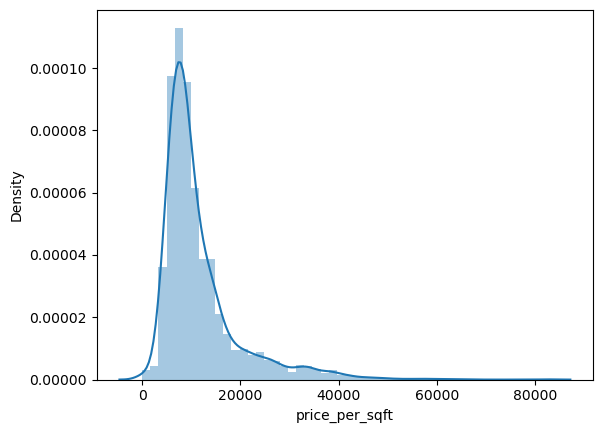

In [18]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

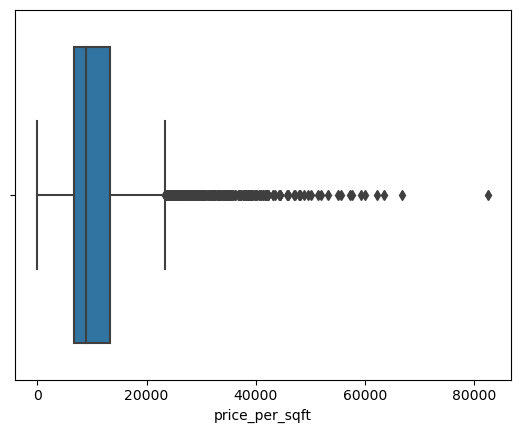

In [19]:
sns.boxplot(x=df['price_per_sqft'])

In [20]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
137,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,153.0
608,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,99.0
681,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,75.0
728,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
980,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1267,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1316,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,122.0
1709,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,137.0
1768,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,160.0
2228,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

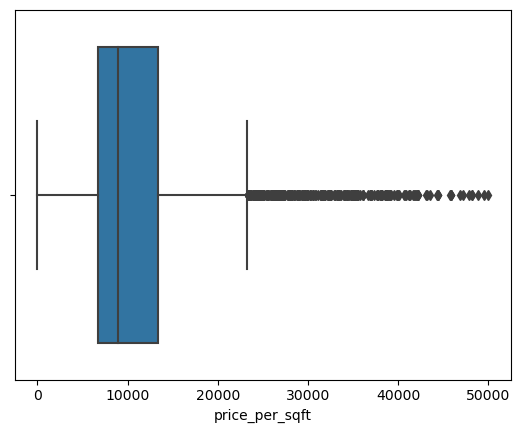

In [22]:
sns.boxplot(x=df['price_per_sqft'])

<b> Area

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

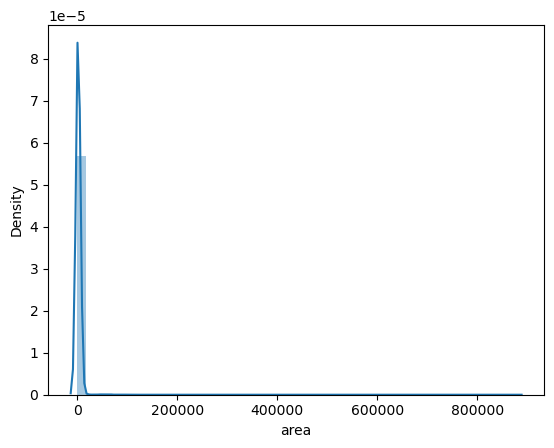

In [23]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

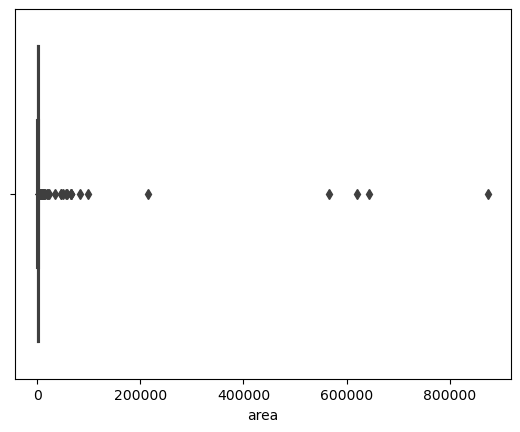

In [24]:
sns.boxplot(x=df['area'])

In [25]:
df['area'].describe()

count      3772.00000
mean       2906.69035
std       22822.30511
min         145.00000
25%        1257.75000
50%        1745.00000
75%        2340.00000
max      875000.00000
Name: area, dtype: float64

In [26]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
832,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0
1441,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0
2007,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0
2682,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,1.0,65.0
3487,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [27]:
df = df[df['area'] < 100000]

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

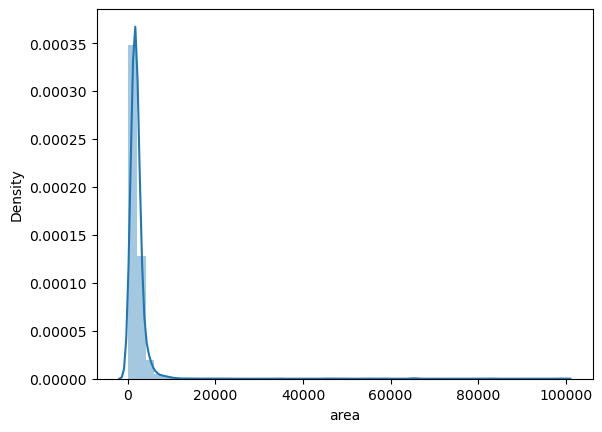

In [28]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

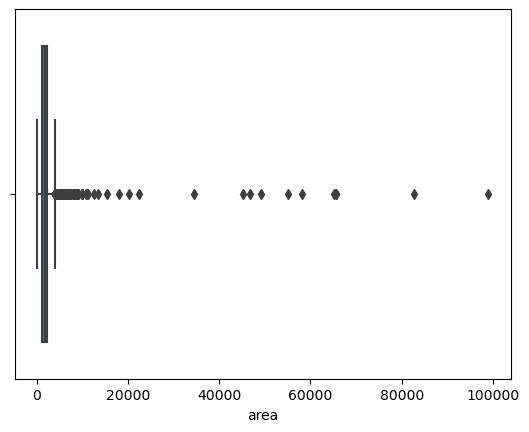

In [29]:
sns.boxplot(x=df['area'])

In [30]:
df[df['area'] > 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
22,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,0.0,60.0
3523,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
864,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,1.0,51.0
1011,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,1.0,15.0
3094,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1696,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,1.0,15.0
816,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,1.0,37.0
1887,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,1.0,37.0
3465,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,0.0,109.0
1479,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,1.0,33.0


In [31]:
df.drop(index=[3523, 864, 1011, 1696, 816, 1887, 1479, 1075, 3729], inplace=True)

In [32]:
df[df['area'] > 10000].sort_values('area', ascending=False)[["price","price_per_sqft","area","bedRoom","super_built_up_area","built_up_area","carpet_area"]]

,price,price_per_sqft,area,bedRoom,super_built_up_area,built_up_area,carpet_area
22,18.40,1859.0,98978.0,6.0,NaN,NaN,11000.00
3094,13.00,1992.0,65261.0,10.0,NaN,NaN,7250.00
3465,7.30,1560.0,46795.0,9.0,NaN,5800.0,5200.00
1951,6.25,2778.0,22498.0,9.0,NaN,2660.0,2500.00
3621,5.50,2716.0,20250.0,8.0,NaN,2850.0,2250.00
1066,2.50,1379.0,18129.0,4.0,NaN,NaN,18122.00
1587,6.95,4490.0,15479.0,3.0,NaN,2160.0,1720.00
290,1.75,1384.0,12645.0,3.0,NaN,NaN,1175.11
1767,27.50,24366.0,11286.0,6.0,NaN,11286.0,NaN
571,13.20,12000.0,11000.0,4.0,NaN,NaN,11000.00


In [33]:
df.loc[22,"area"] = 11000
df.loc[3094,"area"] = 7250
df.loc[3465,"area"] = 5200
df.loc[1951,"area"] = 2500
df.loc[3621,"area"] = 2250
df.loc[1587,"area"] = 1720
df.loc[290,"area"] = 1175
df.loc[979,"area"] = 3500

In [34]:
df[df['area'] > 10000].sort_values('area', ascending=False)[["price","price_per_sqft","area","bedRoom","super_built_up_area","built_up_area","carpet_area"]]

,price,price_per_sqft,area,bedRoom,super_built_up_area,built_up_area,carpet_area
1066,2.5,1379.0,18129.0,4.0,NaN,NaN,18122.0
1767,27.5,24366.0,11286.0,6.0,NaN,11286.0,NaN
22,18.4,1859.0,11000.0,6.0,NaN,NaN,11000.0
571,13.2,12000.0,11000.0,4.0,NaN,NaN,11000.0


In [35]:
df.drop(index=df[df['area'] > 10000].index, inplace=True)

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

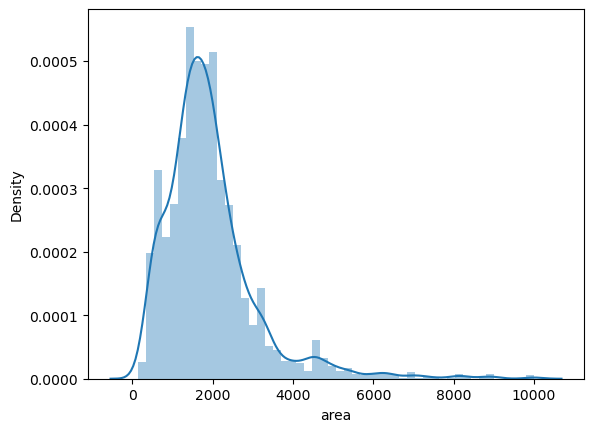

In [36]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

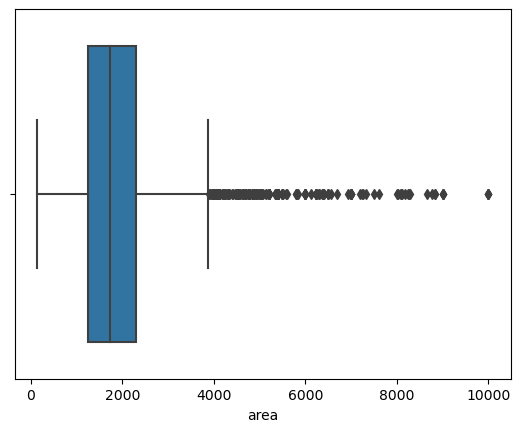

In [37]:
sns.boxplot(x=df['area'])

In [38]:
df['area'].describe()

count     3754.000000
mean      1935.296484
std       1186.404611
min        145.000000
25%       1250.250000
50%       1741.000000
75%       2310.000000
max      10000.000000
Name: area, dtype: float64

# Bedroom

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

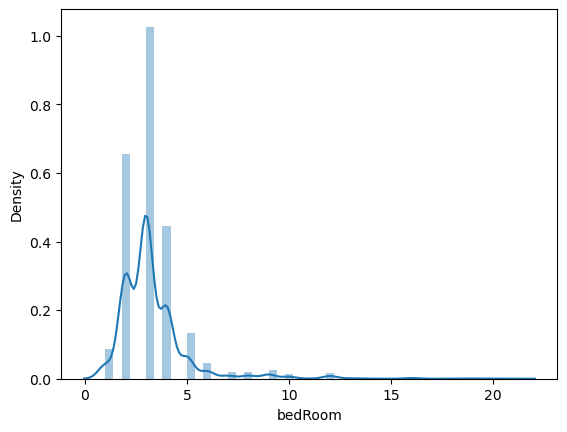

In [39]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

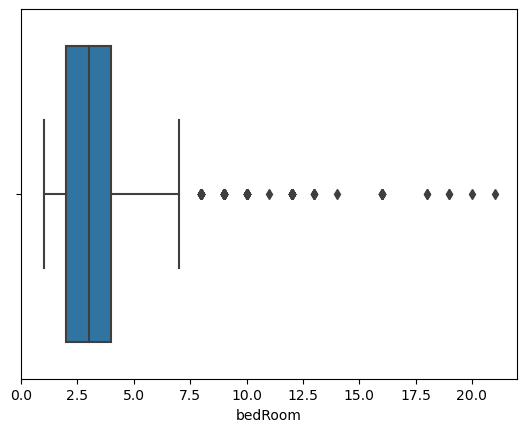

In [40]:
sns.boxplot(x=df['bedRoom'])

In [41]:
df['bedRoom'].describe()

count    3754.000000
mean        3.309004
std         1.807227
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [42]:
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3546,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
3675,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
518,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,74.0
3414,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,68.0
2938,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
3457,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
1811,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,31.0
1718,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,41.0
2799,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,49.0
1347,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,49.0


In [43]:
df = df[df['bedRoom'] <= 10] 

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

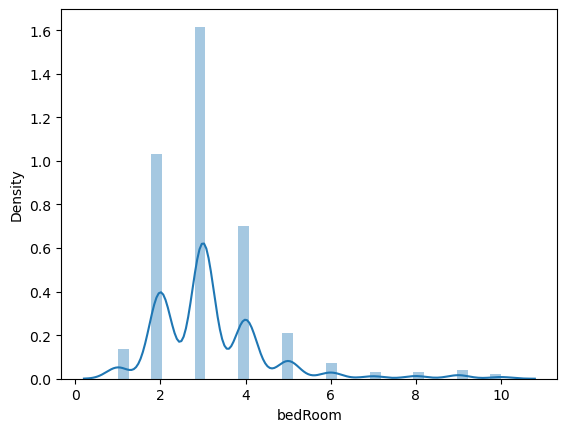

In [44]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

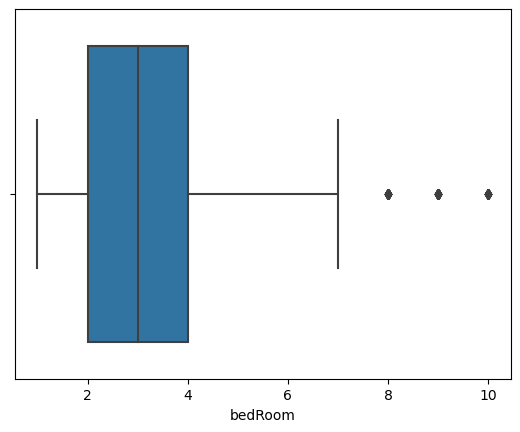

In [45]:
sns.boxplot(x=df['bedRoom'])

In [46]:
df['bedRoom'].describe()

count    3709.000000
mean        3.183068
std         1.378160
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

In [47]:
df.shape

(3709, 23)

# Bathroom 

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

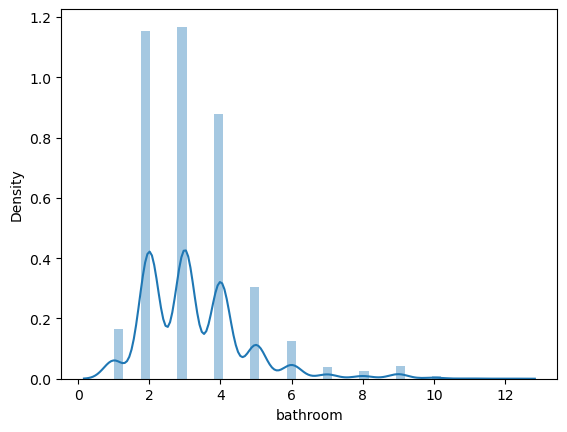

In [48]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

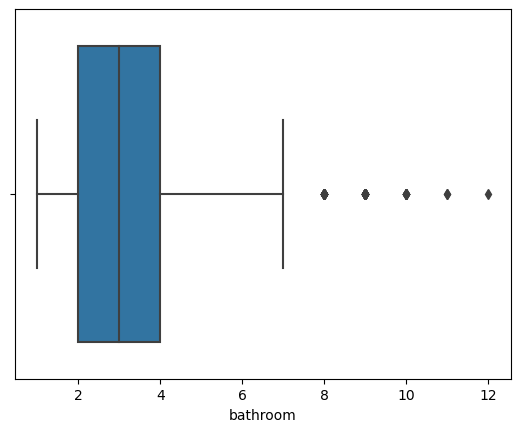

In [49]:
sns.boxplot(x=df['bathroom'])

In [50]:
df['bathroom'].describe()

count    3709.000000
mean        3.254786
std         1.445917
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [51]:
df[df['bathroom'] > 10].sort_values('bathroom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
845,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,146.0
467,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0
3214,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,39.0


In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,3173.0,Super Built up area 2812(261.24 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,2812.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,106.0
1,flat,m3m sierra 68,sector 68,1.08,8674.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,3,1.0,West,Relatively New,1245.0,1130.0,930.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
2,flat,ashiana anmol,sohna road,0.99,8215.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,6.0,East,Undefined,1205.0,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
3,house,independent,sector 38,8.00,25616.0,3123.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10.0,10.0,3+,1.0,North,Undefined,NaN,347.0,215.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4.0,5.0,3+,12.0,South-East,Relatively New,2950.0,2650.0,2450.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0


# super built up area

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

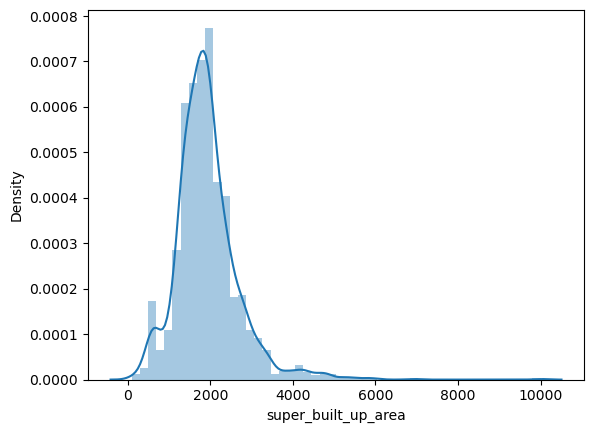

In [53]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

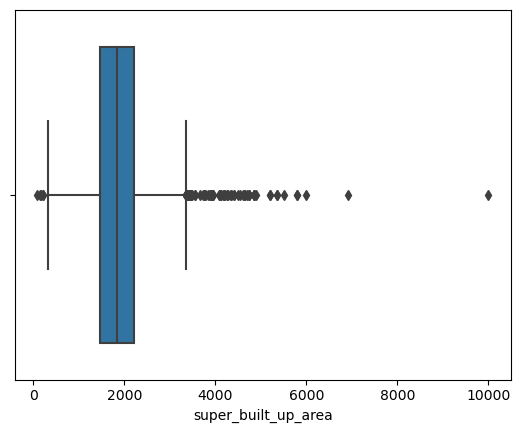

In [54]:
sns.boxplot(x=df['super_built_up_area'])

In [55]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [56]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
7,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0
1201,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,140.0


# built up area

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

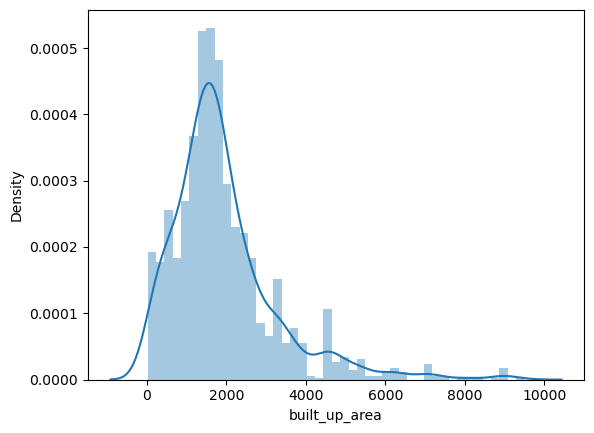

In [57]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

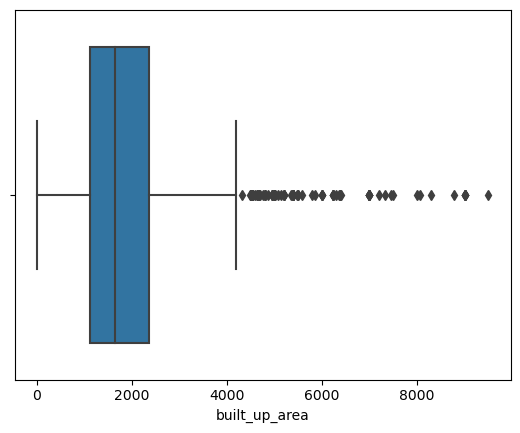

In [58]:
sns.boxplot(x=df['built_up_area'])

In [59]:
df[df['built_up_area'] > 9000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3769,house,independent,sector 25,10.0,37037.0,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 950...,5.0,5.0,3+,3.0,East,Moderately Old,NaN,9500.0,9000.0,0.0,1.0,0.0,1.0,0.0,2.0,29.0


In [60]:
df.loc[3769, ['carpet_area', 'built_up_area']] = (2700, 2700)

In [61]:
df['built_up_area'].describe()

count    1653.000000
mean     1921.484797
std      1355.043400
min        14.000000
25%      1120.000000
50%      1650.000000
75%      2367.000000
max      9000.000000
Name: built_up_area, dtype: float64

# carpet_area

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

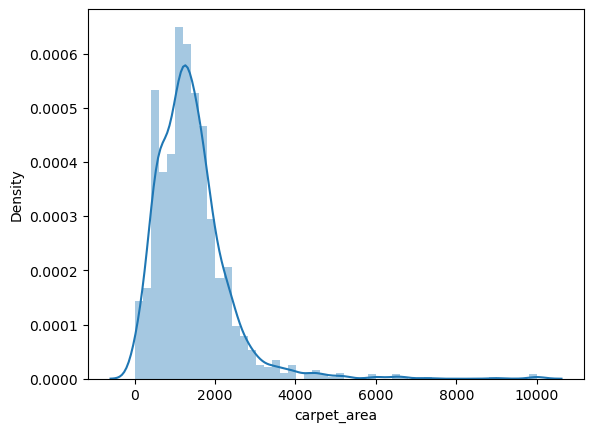

In [62]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

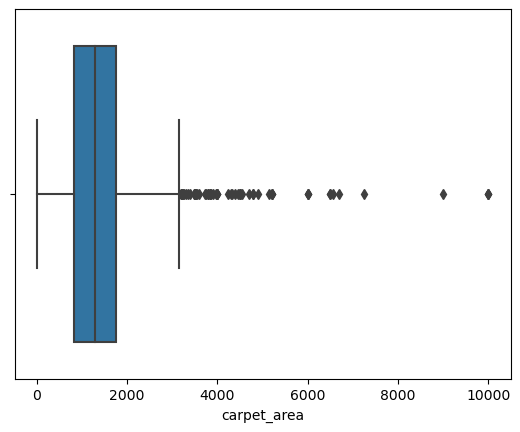

In [63]:
sns.boxplot(x=df['carpet_area'])

In [64]:
df['carpet_area'].describe()

count     1920.000000
mean      1411.319572
std        923.030941
min         15.000000
25%        830.000000
50%       1290.000000
75%       1760.500000
max      10000.000000
Name: carpet_area, dtype: float64

In [65]:
df[df['carpet_area'] > 9000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
163,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4.0,4.0,3,9.0,South-East,Moderately Old,NaN,NaN,10000.0,0.0,1.0,0.0,0.0,0.0,1.0,35.0
1432,house,independent,sector 26,18.25,18250.0,10000.0,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...,7.0,9.0,3+,4.0,East,Relatively New,NaN,NaN,10000.0,1.0,1.0,1.0,1.0,0.0,0.0,77.0
1807,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3.0,9.0,2,3.0,NaN,New Property,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# luxury score

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

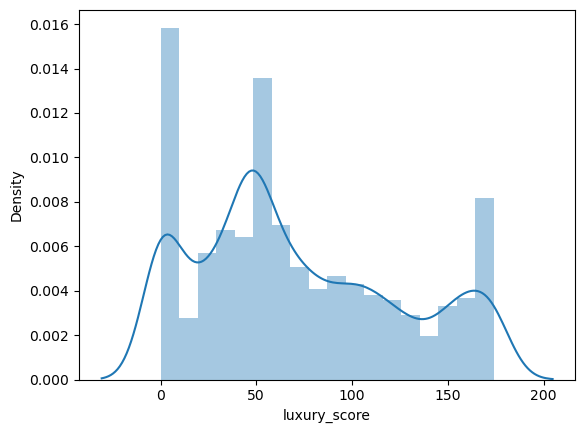

In [66]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

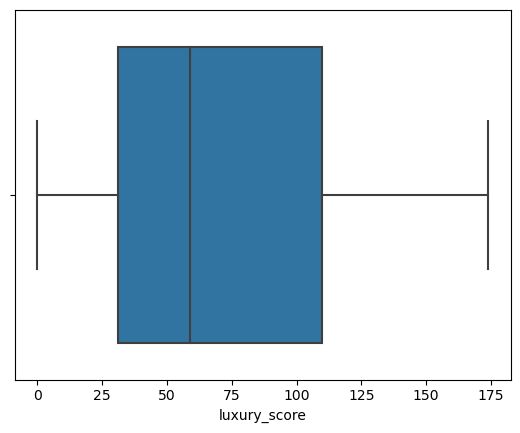

In [67]:
sns.boxplot(x=df['luxury_score'])

In [68]:
df['luxury_score'].describe()

count    3709.000000
mean       71.264492
std        53.022780
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

In [69]:
df.shape

(3709, 23)

# floor num

In [70]:
df['floorNum'].describe()

count    3692.000000
mean        6.875135
std         6.071315
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\3193799054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['floorNum'])


<Axes: xlabel='floorNum', ylabel='Density'>

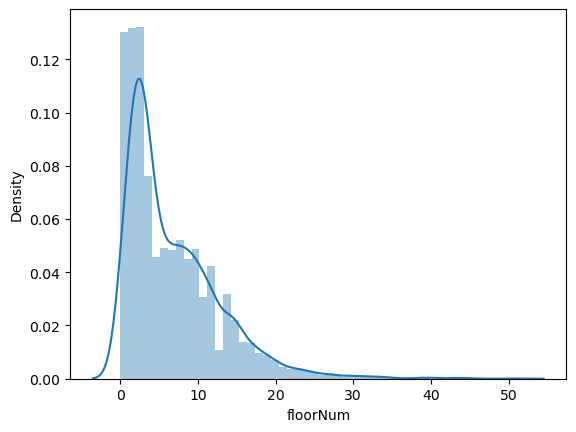

In [71]:
sns.distplot(df['floorNum'])

<Axes: xlabel='floorNum'>

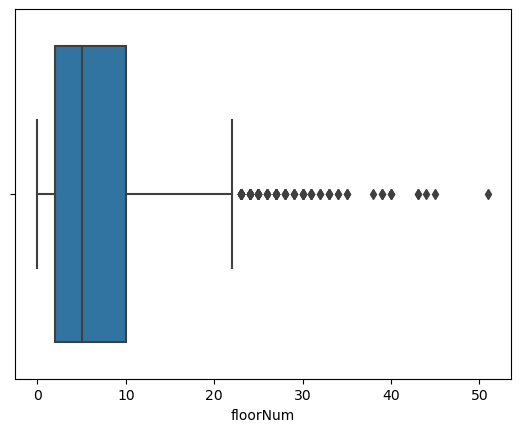

In [72]:
sns.boxplot(x=df['floorNum'])

In [73]:
df[(df['floorNum'] > 25)  & (df['property_type'] == 'house')]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
49,house,dlf the arbour,sector 63,8.5,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4.0,4.0,3+,27.0,NaN,Undefined,NaN,3950.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,61.0
1042,house,godrej meridien,sector 106,5.6,14000.0,4000.0,Plot area 4000(371.61 sq.m.),5.0,4.0,3+,33.0,North-East,New Property,NaN,4000.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,151.0
3007,house,ireo victory valley,sector 67,8.0,22222.0,3600.0,Plot area 400(334.45 sq.m.),6.0,7.0,3+,51.0,North-East,Moderately Old,NaN,3600.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,49.0


# price per sqft

In [74]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [75]:
df['price_per_sqft'].describe()

count     3709.000000
mean     11228.070639
std       7026.098393
min        544.000000
25%       6740.000000
50%       8889.000000
75%      13225.000000
max      49500.000000
Name: price_per_sqft, dtype: float64

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

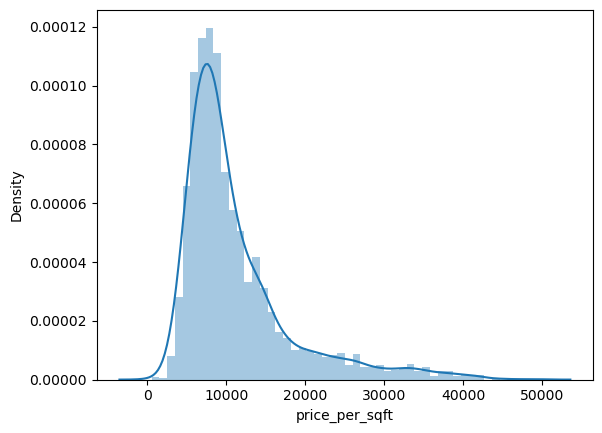

In [76]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

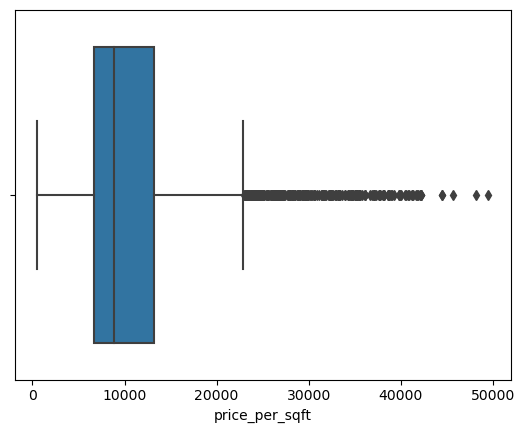

In [77]:
sns.boxplot(x=df['price_per_sqft'])

In [78]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
492,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0
956,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,121.0
1041,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,0.0,88.0
1469,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
1476,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2536,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,103.0
2909,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
3200,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,7.0
3220,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
# Calculating the ratio of rooms to area
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

257.0

In [80]:
df[(df['area']/df['bedRoom']) < 257]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
30,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4.0,2,4.0,North,Moderately Old,NaN,NaN,1500.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.0
31,house,independent,sector 43,5.30,27390.0,1935.0,Plot area 215(179.77 sq.m.),9.0,9.0,3+,3.0,East,Moderately Old,NaN,1935.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,71.0
34,house,independent,sector 7,0.66,12000.0,550.0,Plot area 550(51.1 sq.m.),3.0,1.0,1,3.0,East,Relatively New,NaN,550.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,22.0
59,house,independent,sector 8,0.32,7111.0,450.0,Built Up area: 450 (41.81 sq.m.)Carpet area: 3...,2.0,3.0,1,1.0,North-East,Relatively New,NaN,450.0,300.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4.0,4.0,2,1.0,NaN,Undefined,NaN,480.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,Undefined,NaN,NaN,33.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3770,flat,mvn athens,sohna road,0.26,5394.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2.0,2.0,1,5.0,NaN,Relatively New,NaN,NaN,481.684525,0.0,0.0,0.0,0.0,0.0,1.0,95.0
3777,flat,conscient habitat,sector 99a,0.27,5602.0,482.0,Carpet area: 484 (44.97 sq.m.),2.0,2.0,1,8.0,South-West,Relatively New,NaN,NaN,484.000000,0.0,0.0,0.0,0.0,1.0,1.0,49.0
3793,house,independent,sector 4,0.60,11696.0,513.0,Plot area 57(5.3 sq.m.),3.0,3.0,1,2.0,NaN,Old Property,NaN,57.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0


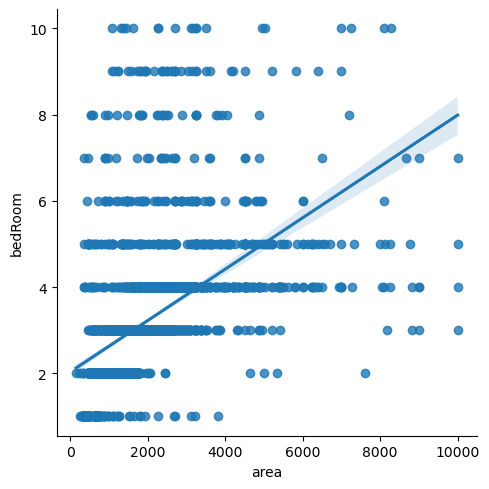

In [81]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [82]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [83]:
(df[df['area_room_ratio'] < 257])['bedRoom'].value_counts()

2.0     56
3.0     41
5.0     28
6.0     18
4.0     17
9.0     15
8.0     12
7.0      8
10.0     7
1.0      1
Name: bedRoom, dtype: int64

In [84]:
df = df[df['area_room_ratio'] > 100]

In [86]:
outliers_df = df[(df['area_room_ratio'] < 257) & (df['bedRoom'] > 3)]

In [87]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\amrit\AppData\Local\Temp\ipykernel_10668\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [88]:
df.update(outliers_df)

In [89]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [90]:
df[(df['area_room_ratio'] < 257) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
249,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,180.000000
472,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,29.0,120.600000
591,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
648,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
1197,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.000000
1825,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120.000000
1995,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113.000000
2322,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,225.000000
2579,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.000000
2924,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.000000


In [91]:
df[(df['area_room_ratio'] < 257) & (df['bedRoom'] > 4)].shape

(13, 24)

In [92]:
df.shape

(3689, 24)

In [94]:
df = df[~((df['area_room_ratio'] < 257) & (df['bedRoom'] > 4))]

In [95]:
df.shape

(3676, 24)

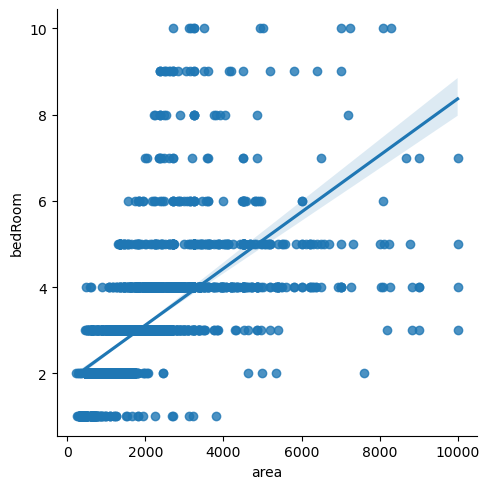

In [96]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [97]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ss the leaf,sector 85,2.20,6934.0,3173.0,Super Built up area 2812(261.24 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,2812.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,106.0,793.25
1,flat,m3m sierra 68,sector 68,1.08,8675.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,3,1.0,West,Relatively New,1245.0,1130.0,930.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,622.50
2,flat,ashiana anmol,sohna road,0.99,8216.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,6.0,East,Undefined,1205.0,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,602.50
3,house,independent,sector 38,8.00,25616.0,3123.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10.0,10.0,3+,1.0,North,Undefined,NaN,347.0,215.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,312.30
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4.0,5.0,3+,12.0,South-East,Relatively New,2950.0,2650.0,2450.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0,737.50


In [98]:
# df.to_csv('../Data_Cleaning/Data/gurgaon_properties_outlier_treated.csv', index=False)